## Columns Description:
**HeartDisease** → Target variable; indicates whether the person has ever had heart disease (Yes / No).
**BMI** → Body Mass Index; a numerical value derived from height and weight (indicator of body fat).
**Smoking** → Whether the person has smoked at least 100 cigarettes in their lifetime (Yes / No).
**AlcoholDrinking** → Indicates if the person consumes alcohol heavily (Yes / No).
**Stroke** → Whether the person has ever had a stroke (Yes / No).
**PhysicalHealth** → Number of days in the past 30 days when the person’s physical health was not good.
**MentalHealth** → Number of days in the past 30 days when the person’s mental health was not good.
**DiffWalking** → Whether the person has serious difficulty walking or climbing stairs (Yes / No).
**Sex** → Biological sex of the person (Male / Female).
**AgeCategory** → Age group category (e.g., 18–24, 25–29, …, 80+).
**Race** → Race or ethnicity of the person (e.g., White, Black, Asian, Hispanic, etc.).
**Diabetic** → Whether the person has diabetes (Yes, No, or borderline conditions).
**PhysicalActivity** → Whether the person performed physical activity or exercise in the past 30 days (Yes / No).
**GenHealth** → General health status as self-rated (e.g., Excellent, Very good, Good, Fair, Poor).
**SleepTime** → Average number of hours of sleep per day.
**Asthma** → Whether the person has ever been told they have asthma (Yes / No).
**KidneyDisease** → Whether the person has ever been told they have kidney disease (Yes / No).
**SkinCancer** → Whether the person has ever been told they have skin cancer (Yes / No).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
df = pd.read_csv('heart_disease_dataset.csv')
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
df['Sex'] = df['Sex'].map({'Male':1, 'Female':0})
df['Sex'].value_counts()

Sex
0    167805
1    151990
Name: count, dtype: int64

In [5]:
def map_zero_one(df, columns):
    for col in columns:
        df[col] = df[col].map({'Yes':1, 'No':0})
    return df

mapping_cols = ['HeartDisease', 'KidneyDisease', 'SkinCancer', 'DiffWalking', 'Stroke', 'AlcoholDrinking', 'Smoking', 'Asthma', 'PhysicalActivity']
df = map_zero_one(df, mapping_cols)    

In [6]:
diabetic_map = {
    'No': 0,
    'No, borderline diabetes': 1,
    'Yes (during pregnancy)': 2,
    'Yes': 3
}

df['Diabetic'] = df['Diabetic'].map(diabetic_map)

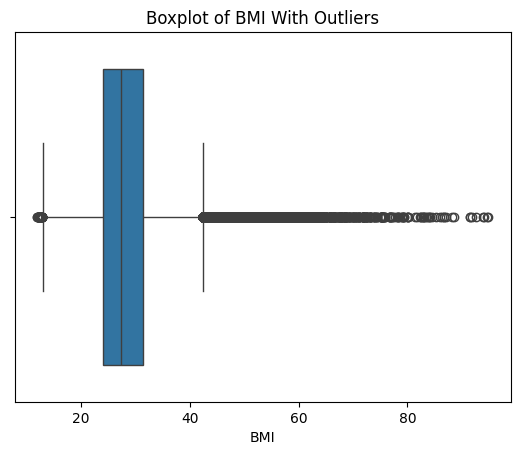

In [7]:
sns.boxplot(x=df['BMI'])
plt.title("Boxplot of BMI With Outliers")
plt.show()

In [8]:
print(f"Shape of Data Before Removing Outliers: {df.shape}")
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['BMI'] < lower_limit) | (df['BMI'] > upper_limit)]
print(f"Outliers : {len(outliers)}")

df = df[(df['BMI'] >= lower_limit) & (df['BMI'] <= upper_limit)]
print(f"Shape of Data After Removing Outliers: {df.shape}")

Shape of Data Before Removing Outliers: (319795, 18)
Outliers : 10396
Shape of Data After Removing Outliers: (309399, 18)


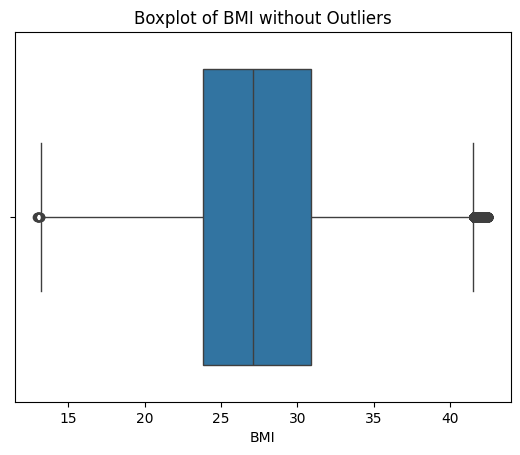

In [9]:
sns.boxplot(x=df['BMI'])
plt.title("Boxplot of BMI without Outliers")
plt.show()


In [10]:
print(f"Shape of Data Before Removing Outliers: {df.shape}")
Q1 = df['PhysicalHealth'].quantile(0.25)
Q3 = df['PhysicalHealth'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['PhysicalHealth'] < lower_limit) | (df['PhysicalHealth'] > upper_limit)]
print(f"Outliers : {len(outliers)}")

df = df[(df['PhysicalHealth'] >= lower_limit) & (df['PhysicalHealth'] <= upper_limit)]
print(f"Shape of Data After Removing Outliers: {df.shape}")

Shape of Data Before Removing Outliers: (309399, 18)
Outliers : 43924
Shape of Data After Removing Outliers: (265475, 18)


In [11]:
print(f"Shape of Data Before Removing Outliers: {df.shape}")
Q1 = df['MentalHealth'].quantile(0.25)
Q3 = df['MentalHealth'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['MentalHealth'] < lower_limit) | (df['MentalHealth'] > upper_limit)]
print(f"Outliers : {len(outliers)}")

df = df[(df['MentalHealth'] >= lower_limit) & (df['MentalHealth'] <= upper_limit)]
print(f"Shape of Data After Removing Outliers: {df.shape}")

Shape of Data Before Removing Outliers: (265475, 18)
Outliers : 37754
Shape of Data After Removing Outliers: (227721, 18)


In [12]:
print(f"Shape of Data Before Removing Outliers: {df.shape}")
Q1 = df['SleepTime'].quantile(0.25)
Q3 = df['SleepTime'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['SleepTime'] < lower_limit) | (df['SleepTime'] > upper_limit)]
print(f"Outliers : {len(outliers)}")

df = df[(df['SleepTime'] >= lower_limit) & (df['SleepTime'] <= upper_limit)]
print(f"Shape of Data After Removing Outliers: {df.shape}")

Shape of Data Before Removing Outliers: (227721, 18)
Outliers : 2250
Shape of Data After Removing Outliers: (225471, 18)


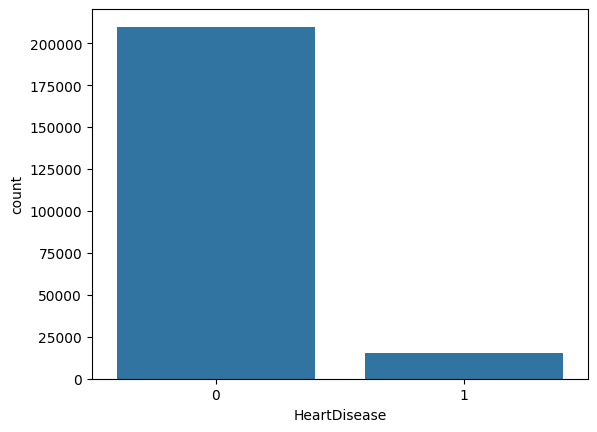

In [13]:
sns.countplot(x=df['HeartDisease'])
plt.show()

In [14]:
df['HeartDisease'].value_counts()

HeartDisease
0    209840
1     15631
Name: count, dtype: int64

In [15]:
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,80 or older,White,3,0,Good,9.0,1,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225471 entries, 1 to 319792
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      225471 non-null  int64  
 1   BMI               225471 non-null  float64
 2   Smoking           225471 non-null  int64  
 3   AlcoholDrinking   225471 non-null  int64  
 4   Stroke            225471 non-null  int64  
 5   PhysicalHealth    225471 non-null  float64
 6   MentalHealth      225471 non-null  float64
 7   DiffWalking       225471 non-null  int64  
 8   Sex               225471 non-null  int64  
 9   AgeCategory       225471 non-null  object 
 10  Race              225471 non-null  object 
 11  Diabetic          225471 non-null  int64  
 12  PhysicalActivity  225471 non-null  int64  
 13  GenHealth         225471 non-null  object 
 14  SleepTime         225471 non-null  float64
 15  Asthma            225471 non-null  int64  
 16  KidneyDisease     225471 

In [17]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']


In [18]:
#column distribution
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime','Smoking','AlcoholDrinking','Stroke','DiffWalking','KidneyDisease','SkinCancer']
categorical_cols = ['Race']
ordinal_cols = ['GenHealth', 'AgeCategory']


In [19]:
#ordinal mapping
age_mapping = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13
}
genhealth_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5
}

preprocessing = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols),
    ('ord', OrdinalEncoder(categories=[list(age_mapping.values()), list(genhealth_mapping.values())], handle_unknown='use_encoded_value', unknown_value=-1), ordinal_cols)
])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
#All models for Classification comparison
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'XGBClassifier':XGBClassifier()
}

In [22]:
# add smote to the pipeline
for name,model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessing),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print('-' * 40)

Model: RandomForest
ROC-AUC Score: 0.5506
----------------------------------------
Model: XGBoost
ROC-AUC Score: 0.6226
----------------------------------------
Model: LogisticRegression
ROC-AUC Score: 0.6594
----------------------------------------
Model: GradientBoostingClassifier
ROC-AUC Score: 0.6539
----------------------------------------
Model: KNeighborsClassifier
ROC-AUC Score: 0.5827
----------------------------------------
Model: XGBClassifier
ROC-AUC Score: 0.6226
----------------------------------------


In [23]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Improved pipeline
pipe_lr = ImbPipeline([
    ('preprocessor', preprocessing),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = cross_val_score(pipe_lr, X, y, cv=cv, scoring='roc_auc')
print("ROC-AUC Scores:", roc_auc_scores)
print("Mean ROC-AUC:", roc_auc_scores.mean())


ROC-AUC Scores: [0.72405611 0.71299496 0.74110455 0.72538693 0.73174658]
Mean ROC-AUC: 0.7270578269137324


In [26]:
pipe_lr.fit(X, y)
# Save the final pipeline 
import joblib
joblib.dump(pipe_lr, 'heart_disease_model.pkl')
print("Model saved successfully as 'heart_disease_model.pkl'")

Model saved successfully as 'heart_disease_model.pkl'
